<a href="https://colab.research.google.com/github/financieras/math_for_ai/blob/main/estadistica/Leccion_1_2_Escalas_Medicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lección 1.2. Escalas de medición: nominal, ordinal, intervalo y razón

---

## 1. Introducción: ¿Por qué importan las escalas de medición?

En la lección anterior aprendimos a clasificar variables en cualitativas y cuantitativas. Pero hay un nivel más profundo de análisis: **las escalas de medición**.

Imagina que tienes estos datos:
- Jugador A lleva el dorsal **10**
- La temperatura es de **10** grados
- El producto tiene **10** valoraciones

Los tres son "10", pero:
- ¿Tiene sentido decir que el dorsal 10 es el doble que el dorsal 5? **No**
- ¿Podemos decir que 10°C es el doble de caliente que 5°C? **No**
- ¿Podemos decir que 10 valoraciones son el doble que 5? **Sí**

Esta diferencia se debe a la **escala de medición** de cada variable. Comprender las escalas nos ayuda a:

1. **Elegir las operaciones matemáticas correctas**
2. **Seleccionar las pruebas estadísticas adecuadas**
3. **Interpretar correctamente los resultados**
4. **Evitar errores graves en análisis de datos**

El psicólogo **Stanley Stevens** (1946) propuso cuatro niveles de medición que forman una jerarquía:

---

## 2. Jerarquía de las escalas de medición

```
┌─────────────────────────────────────────────────┐
│  ESCALA DE RAZÓN                                │
│  • Identifica • Ordena • Distancia • Cero abs. │  ← Más información
├─────────────────────────────────────────────────┤
│  ESCALA DE INTERVALO                            │
│  • Identifica • Ordena • Distancia              │
├─────────────────────────────────────────────────┤
│  ESCALA ORDINAL                                 │
│  • Identifica • Ordena                          │
├─────────────────────────────────────────────────┤
│  ESCALA NOMINAL                                 │
│  • Identifica                                   │  ← Menos información
└─────────────────────────────────────────────────┘
```

Cada nivel **hereda** las propiedades del anterior y añade características nuevas.

---

## 3. Escala Nominal

### 3.1. Definición

La **escala nominal** es el nivel más básico de medición. Los números (si se usan) funcionan como **etiquetas** o **nombres** para identificar categorías. No tienen un orden ni se pueden hacer operaciones aritméticas.

**Características:**
- ✅ Identifica categorías diferentes
- ❌ No hay orden inherente
- ❌ No se pueden sumar, restar, multiplicar o dividir
- ❌ No tiene cero absoluto

### 3.2. Ejemplos

| Variable | Valores posibles | ¿Por qué es nominal? |
|----------|------------------|----------------------|
| **Género** | Masculino, Femenino, No binario | No hay orden entre categorías |
| **Color de ojos** | Azul, Verde, Marrón, Negro | Ningún color es "mayor" que otro |
| **Número de dorsal** | 1, 7, 10, 23 | El 10 no es "el doble" que el 5 |
| **Código postal** | 28001, 08001, 41001 | Solo identifican zonas |
| **Tipo de cliente** | Nuevo, Recurrente, VIP | Solo categorías |
| **País de origen** | España, Francia, Alemania | Sin orden natural |

### 3.3. Operaciones permitidas

**Lo que SÍ podemos hacer:**
- Contar frecuencias: "Hay 45 usuarios de género masculino"
- Calcular la moda: "El color de ojos más común es marrón"
- Test de independencia Chi-cuadrado

**Lo que NO podemos hacer:**
- Calcular media o mediana
- Ordenar de menor a mayor
- Calcular distancias

Escala Nominal - Método de pago
metodo_pago
Efectivo         30
PayPal           26
Transferencia    24
Tarjeta          20
Name: count, dtype: int64

Moda (categoría más frecuente): Efectivo


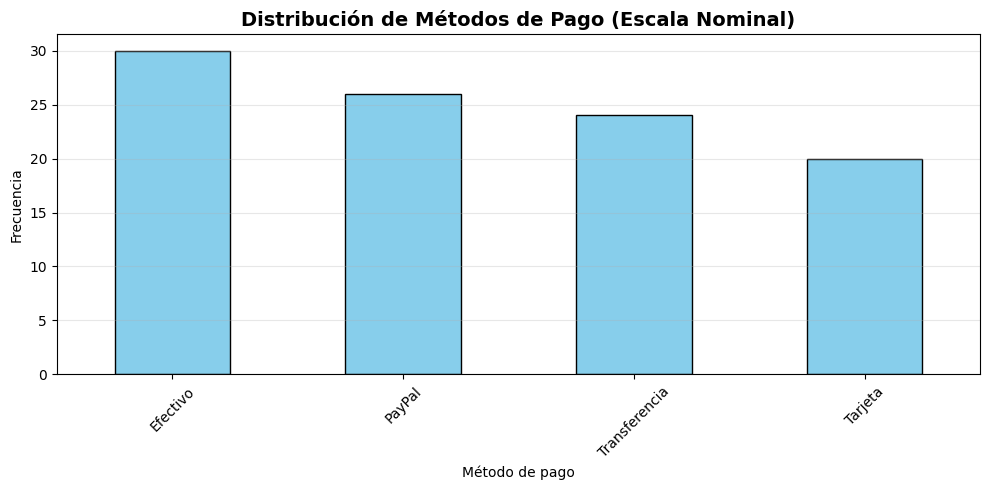


⚠️ ERROR COMÚN:
No tiene sentido calcular la 'media' de métodos de pago
Tampoco podemos decir que 'PayPal' es mayor que 'Tarjeta'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ejemplo: Variable nominal
np.random.seed(42)

datos_nominal = pd.DataFrame({
    'usuario_id': range(1, 101),
    'metodo_pago': np.random.choice(['Tarjeta', 'PayPal', 'Transferencia', 'Efectivo'], 100)
})

print("Escala Nominal - Método de pago")
print("="*50)
frecuencias = datos_nominal['metodo_pago'].value_counts()
print(frecuencias)
print(f"\nModa (categoría más frecuente): {datos_nominal['metodo_pago'].mode()[0]}")

# Visualización
plt.figure(figsize=(10, 5))
frecuencias.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de Métodos de Pago (Escala Nominal)', fontsize=14, fontweight='bold')
plt.xlabel('Método de pago')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ERROR COMÚN: Intentar calcular la media
print("\n⚠️ ERROR COMÚN:")
print("No tiene sentido calcular la 'media' de métodos de pago")
print("Tampoco podemos decir que 'PayPal' es mayor que 'Tarjeta'")

---

## 4. Escala Ordinal

### 4.1. Definición

La **escala ordinal** añade una propiedad importante: **el orden**. Las categorías se pueden ordenar, pero la distancia entre ellas no es uniforme ni cuantificable.

**Características:**
- ✅ Identifica categorías diferentes
- ✅ Tiene un orden natural (mayor que, menor que)
- ❌ La distancia entre categorías no es igual
- ❌ No se pueden hacer operaciones aritméticas significativas

### 4.2. Ejemplos

| Variable | Valores posibles | ¿Por qué es ordinal? |
|----------|------------------|----------------------|
| **Nivel educativo** | Primaria < Secundaria < Universidad | Hay orden, pero la distancia entre niveles no es igual |
| **Satisfacción** | Muy insatisfecho < Insatisfecho < Neutral < Satisfecho < Muy satisfecho | El salto entre categorías no es constante |
| **Talla de ropa** | XS < S < M < L < XL < XXL | Orden claro, distancias variables |
| **Ranking** | 1º < 2º < 3º < 4º | Posición relativa |
| **Nivel de habilidad** | Principiante < Intermedio < Avanzado < Experto | Orden jerárquico |
| **Calificación con letras** | F < D < C < B < A | Orden académico |

### 4.3. La clave: distancias no uniformes

La diferencia entre "Muy insatisfecho" e "Insatisfecho" **NO es necesariamente igual** a la diferencia entre "Satisfecho" y "Muy satisfecho".

$$\text{Muy Insatisfecho} \xrightarrow{?} \text{Insatisfecho} \xrightarrow{?} \text{Neutral} \xrightarrow{?} \text{Satisfecho}$$

Las flechas tienen longitudes desconocidas y posiblemente diferentes.

### 4.4. Operaciones permitidas

**Lo que SÍ podemos hacer:**
- Todo lo de la escala nominal (frecuencias, moda)
- Calcular la **mediana**: el valor central ordenado
- Calcular percentiles y cuartiles
- Tests no paramétricos: Mann-Whitney, Kruskal-Wallis

**Lo que NO podemos hacer:**
- Calcular la media de forma significativa
- Sumar o restar valores
- Decir "el doble de satisfecho"

In [2]:
# Ejemplo: Variable ordinal
np.random.seed(123)

# Creamos datos de satisfacción del cliente
satisfaccion_valores = ['Muy insatisfecho', 'Insatisfecho', 'Neutral', 'Satisfecho', 'Muy satisfecho']

datos_ordinal = pd.DataFrame({
    'cliente_id': range(1, 201),
    'satisfaccion': np.random.choice(satisfaccion_valores, 200, p=[0.05, 0.10, 0.15, 0.45, 0.25])
})

# Convertimos a Categorical con orden
datos_ordinal['satisfaccion'] = pd.Categorical(
    datos_ordinal['satisfaccion'],
    categories=satisfaccion_valores,
    ordered=True
)

print("Escala Ordinal - Satisfacción del Cliente")
print("="*50)
print(datos_ordinal['satisfaccion'].value_counts().sort_index())
print(f"\nModa: {datos_ordinal['satisfaccion'].mode()[0]}")
print(f"Mediana: {datos_ordinal['satisfaccion'].median()}")

# Visualización
plt.figure(figsize=(12, 5))
conteo = datos_ordinal['satisfaccion'].value_counts().sort_index()
colores = ['#d32f2f', '#f57c00', '#fbc02d', '#7cb342', '#388e3c']
conteo.plot(kind='bar', color=colores, edgecolor='black')
plt.title('Distribución de Satisfacción del Cliente (Escala Ordinal)', fontsize=14, fontweight='bold')
plt.xlabel('Nivel de satisfacción')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n⚠️ ADVERTENCIA:")
print("Aunque podemos codificar como números (1-5), calcular la 'media' es cuestionable")
print("porque asume que las distancias entre categorías son iguales.")

Escala Ordinal - Satisfacción del Cliente
satisfaccion
Muy insatisfecho      7
Insatisfecho         18
Neutral              24
Satisfecho          110
Muy satisfecho       41
Name: count, dtype: int64

Moda: Satisfecho


TypeError: 'Categorical' with dtype category does not support reduction 'median'

---

## 5. Escala de Intervalo

### 5.1. Definición

La **escala de intervalo** añade una característica fundamental: **las distancias entre valores son iguales y significativas**. Sin embargo, **no existe un cero absoluto** (el cero es arbitrario).

**Características:**
- ✅ Identifica categorías diferentes
- ✅ Tiene un orden natural
- ✅ Las distancias son iguales y medibles
- ❌ El cero es arbitrario (no significa "ausencia total")
- ❌ No se pueden hacer razones o proporciones

### 5.2. El problema del cero arbitrario

En una escala de intervalo, el **cero NO significa ausencia** del atributo. Es solo un punto de referencia arbitrario.

**Ejemplo clásico: Temperatura en Celsius**
- 0°C no significa "ausencia de temperatura"
- Es simplemente el punto de congelación del agua (convención)
- 20°C NO es "el doble de caliente" que 10°C
- Si lo fuera, 20°C = 293.15 K y 10°C = 283.15 K, y $\frac{293.15}{283.15} \neq 2$

### 5.3. Ejemplos

| Variable | Valores | ¿Por qué es intervalo? |
|----------|---------|------------------------|
| **Temperatura (°C o °F)** | -10°C, 0°C, 10°C, 20°C | Cero arbitrario, razones sin sentido |
| **Año calendario** | 1990, 2000, 2010, 2020 | El año 0 es convencional |
| **Coeficiente intelectual (IQ)** | 85, 100, 115, 130 | IQ de 0 no significa "sin inteligencia" |
| **pH** | 1, 7, 14 | pH 0 no es "ausencia de acidez" |
| **Coordenadas (latitud/longitud)** | -40°, 0°, 40° | El 0° es el Ecuador/Greenwich (arbitrario) |

### 5.4. Operaciones permitidas

**Lo que SÍ podemos hacer:**
- Todo lo de escalas nominal y ordinal
- Calcular la **media** y **desviación estándar**
- **Sumar y restar** valores: $20°C - 10°C = 10°C$ de diferencia
- Calcular correlaciones
- Aplicar tests paramétricos (t-test, ANOVA)

**Lo que NO podemos hacer:**
- **Multiplicar o dividir** para hacer comparaciones de proporción
- Decir "20°C es el doble de caliente que 10°C"
- Calcular coeficientes de variación

In [ ]:
# Ejemplo: Escala de Intervalo - Temperatura
np.random.seed(456)

# Simulamos temperaturas diarias en Celsius
temperaturas_celsius = np.random.normal(loc=22, scale=5, size=365).round(1)

print("Escala de Intervalo - Temperatura en °C")
print("="*50)
print(f"Media: {temperaturas_celsius.mean():.2f}°C")
print(f"Desviación estándar: {temperaturas_celsius.std():.2f}°C")
print(f"Rango: {temperaturas_celsius.min():.1f}°C - {temperaturas_celsius.max():.1f}°C")

# Conversión a Kelvin (escala de razón)
temperaturas_kelvin = temperaturas_celsius + 273.15

print("\n" + "="*50)
print("Demostración: ¿Por qué no podemos usar razones?")
print("="*50)
temp1_c, temp2_c = 10, 20
temp1_k = temp1_c + 273.15
temp2_k = temp2_c + 273.15

print(f"\nTemperatura 1: {temp1_c}°C = {temp1_k}K")
print(f"Temperatura 2: {temp2_c}°C = {temp2_k}K")
print(f"\nRazón en Celsius: {temp2_c}/{temp1_c} = {temp2_c/temp1_c:.2f}")
print(f"Razón en Kelvin: {temp2_k:.2f}/{temp1_k:.2f} = {temp2_k/temp1_k:.2f}")
print("\n⚠️ Las razones dan valores diferentes: no tiene sentido en escala de intervalo!")

# Visualización
plt.figure(figsize=(12, 5))
plt.hist(temperaturas_celsius, bins=30, color='coral', edgecolor='black', alpha=0.7)
plt.axvline(temperaturas_celsius.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {temperaturas_celsius.mean():.1f}°C')
plt.title('Distribución de Temperaturas Diarias (Escala de Intervalo)', fontsize=14, fontweight='bold')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

---

## 6. Escala de Razón

### 6.1. Definición

La **escala de razón** es el nivel más alto de medición. Tiene todas las propiedades de las escalas anteriores y además **posee un cero absoluto** que representa la ausencia total del atributo.

**Características:**
- ✅ Identifica categorías diferentes
- ✅ Tiene un orden natural
- ✅ Las distancias son iguales y medibles
- ✅ Tiene un cero absoluto (ausencia total)
- ✅ Se pueden hacer razones y proporciones con sentido

### 6.2. El cero absoluto

Un **cero absoluto** significa que NO existe el atributo en absoluto:
- 0 kg = sin masa
- 0 segundos = sin tiempo
- 0 euros = sin dinero
- 0 metros = sin distancia

Esto permite hacer afirmaciones como:
$$\frac{20 \text{ kg}}{10 \text{ kg}} = 2 \quad \text{(20 kg es el doble de 10 kg)}$$

### 6.3. Ejemplos

| Variable | Valores | ¿Por qué es razón? |
|----------|---------|--------------------|
| **Peso** | 0 kg, 50 kg, 100 kg | 0 = sin masa, 100 kg es el doble de 50 kg |
| **Altura** | 0 cm, 150 cm, 180 cm | 0 = sin altura, 180 cm es 1.2 veces 150 cm |
| **Tiempo** | 0 seg, 30 seg, 60 seg | 0 = sin tiempo, 60 seg es el doble de 30 seg |
| **Dinero** | 0 €, 100 €, 500 € | 0 = sin dinero, 500 € es 5 veces 100 € |
| **Edad** | 0 años, 25 años, 50 años | 0 = recién nacido, 50 años es el doble de 25 |
| **Distancia** | 0 m, 100 m, 1000 m | 0 = sin distancia, 1000 m es 10 veces 100 m |
| **Número de productos** | 0, 10, 50 | 0 = ningún producto, 50 es 5 veces 10 |
| **Temperatura en Kelvin** | 0 K, 273 K, 373 K | 0 K = cero absoluto (sin movimiento molecular) |

### 6.4. Operaciones permitidas

**Lo que SÍ podemos hacer:**
- **TODAS las operaciones estadísticas**
- Media, mediana, moda, desviación estándar
- Sumar, restar, multiplicar, dividir
- **Razones y proporciones**: "A es el doble de B"
- Coeficiente de variación: $CV = \frac{s}{\bar{x}} \times 100\%$
- Transformaciones logarítmicas
- Todos los tests estadísticos

In [ ]:
# Ejemplo: Escala de Razón - Ingresos mensuales
np.random.seed(789)

# Simulamos ingresos mensuales (en euros)
ingresos = np.random.gamma(shape=2, scale=1000, size=500).round(2)

print("Escala de Razón - Ingresos Mensuales (€)")
print("="*50)
print(f"Media: {ingresos.mean():.2f}€")
print(f"Mediana: {np.median(ingresos):.2f}€")
print(f"Desviación estándar: {ingresos.std():.2f}€")
print(f"Coeficiente de variación: {(ingresos.std()/ingresos.mean())*100:.2f}%")
print(f"Rango: {ingresos.min():.2f}€ - {ingresos.max():.2f}€")

print("\n" + "="*50)
print("Operaciones con razones (válidas en escala de razón):")
print("="*50)
ingreso_persona_a = 3000
ingreso_persona_b = 1500

print(f"\nPersona A: {ingreso_persona_a}€")
print(f"Persona B: {ingreso_persona_b}€")
print(f"\nPersona A gana {ingreso_persona_a/ingreso_persona_b:.1f} veces lo que gana Persona B")
print(f"Persona A gana {ingreso_persona_a - ingreso_persona_b}€ más que Persona B")
print(f"Persona A gana un {((ingreso_persona_a/ingreso_persona_b - 1)*100):.0f}% más que Persona B")
print("\n✅ Todas estas operaciones tienen sentido porque hay un cero absoluto (0€ = sin dinero)")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(ingresos, bins=40, color='mediumseagreen', edgecolor='black', alpha=0.7)
axes[0].axvline(ingresos.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {ingresos.mean():.0f}€')
axes[0].axvline(np.median(ingresos), color='blue', linestyle='--', linewidth=2, label=f'Mediana: {np.median(ingresos):.0f}€')
axes[0].set_title('Distribución de Ingresos (Escala de Razón)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Ingresos (€)')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Boxplot
axes[1].boxplot(ingresos, vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='black'),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))
axes[1].set_title('Boxplot de Ingresos', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Ingresos (€)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---

## 7. Tabla comparativa de escalas de medición

| Propiedad | Nominal | Ordinal | Intervalo | Razón |
|-----------|---------|---------|-----------|-------|
| **Identifica categorías** | ✅ | ✅ | ✅ | ✅ |
| **Orden** | ❌ | ✅ | ✅ | ✅ |
| **Distancias iguales** | ❌ | ❌ | ✅ | ✅ |
| **Cero absoluto** | ❌ | ❌ | ❌ | ✅ |
| **Moda** | ✅ | ✅ | ✅ | ✅ |
| **Mediana** | ❌ | ✅ | ✅ | ✅ |
| **Media** | ❌ | ❌* | ✅ | ✅ |
| **Suma/Resta** | ❌ | ❌ | ✅ | ✅ |
| **Multiplicación/División** | ❌ | ❌ | ❌ | ✅ |
| **Razones** | ❌ | ❌ | ❌ | ✅ |
| **Coef. de variación** | ❌ | ❌ | ❌ | ✅ |

*Aunque técnicamente se puede calcular codificando números, su interpretación es cuestionable.

---

## 8. Ejemplos comparativos

Veamos cómo la misma "cosa" puede tener diferentes escalas dependiendo de cómo la midamos:

In [ ]:
# Ejemplo comparativo: Rendimiento académico en diferentes escalas

print("Rendimiento Académico según Escala de Medición")
print("="*70)

estudiante_data = pd.DataFrame({
    'Estudiante': ['Ana', 'Carlos', 'María', 'Juan', 'Laura'],
    'Nominal': ['Aprobado', 'Suspenso', 'Aprobado', 'Aprobado', 'Aprobado'],
    'Ordinal': ['Sobresaliente', 'Suspenso', 'Notable', 'Bien', 'Notable'],
    'Intervalo': [95, 45, 82, 70, 85],  # Nota de 0-100 (sin cero absoluto real)
    'Razón': [19, 9, 16, 14, 17]  # Respuestas correctas de 20 (0 = ninguna correcta)
})

print(estudiante_data.to_string(index=False))

print("\n" + "="*70)
print("Análisis según escala:")
print("="*70)

print("\n1. NOMINAL (Aprobado/Suspenso):")
print(f"   - Moda: {estudiante_data['Nominal'].mode()[0]}")
print(f"   - Aprobados: {(estudiante_data['Nominal'] == 'Aprobado').sum()}")
print("   - ❌ No podemos calcular media ni ordenar")

print("\n2. ORDINAL (Sobresaliente, Notable, Bien, Suspenso):")
orden_calif = ['Suspenso', 'Aprobado', 'Bien', 'Notable', 'Sobresaliente']
calif_ordenadas = pd.Categorical(estudiante_data['Ordinal'], categories=orden_calif, ordered=True)
print(f"   - Calificaciones ordenadas: {sorted(estudiante_data['Ordinal'], key=lambda x: orden_calif.index(x))}")
print("   - ✅ Podemos ordenar")
print("   - ❌ La distancia entre 'Bien' y 'Notable' no es necesariamente igual que entre 'Notable' y 'Sobresaliente'")

print("\n3. INTERVALO (Nota 0-100):")
print(f"   - Media: {estudiante_data['Intervalo'].mean():.1f}")
print(f"   - Desviación estándar: {estudiante_data['Intervalo'].std():.1f}")
print(f"   - Diferencia entre Ana y María: {estudiante_data.loc[0, 'Intervalo'] - estudiante_data.loc[2, 'Intervalo']} puntos")
print("   - ❌ NO podemos decir que Ana (95) es '2.11 veces mejor' que Carlos (45)")

print("\n4. RAZÓN (Respuestas correctas de 20):")
print(f"   - Media: {estudiante_data['Razón'].mean():.1f} respuestas correctas")
print(f"   - Ana tiene {estudiante_data.loc[0, 'Razón']} correctas, Carlos {estudiante_data.loc[1, 'Razón']}")
print(f"   - ✅ Ana respondió correctamente {estudiante_data.loc[0, 'Razón']/estudiante_data.loc[1, 'Razón']:.2f} veces más que Carlos")
print(f"   - ✅ Coeficiente de variación: {(estudiante_data['Razón'].std()/estudiante_data['Razón'].mean())*100:.1f}%")

---

## 9. Implicaciones para Machine Learning

Entender las escalas de medición es crucial en ML porque afecta a:

### 9.1. Preprocesamiento de datos

| Escala | Encoding necesario | Normalización |
|--------|-------------------|---------------|
| **Nominal** | One-Hot Encoding, Label Encoding | No aplica |
| **Ordinal** | Ordinal Encoding (con orden) | Cuestionable |
| **Intervalo** | No necesario | StandardScaler (estandarización) |
| **Razón** | No necesario | MinMaxScaler, StandardScaler |

### 9.2. Elección de métricas de distancia

- **Nominal**: Distancia de Hamming, Jaccard
- **Ordinal**: Distancia de Manhattan (con cuidado)
- **Intervalo/Razón**: Euclidiana, Manhattan, Coseno

### 9.3. Selección de modelos

- Variables nominales → Algoritmos basados en árboles, Naive Bayes
- Variables ordinales → Modelos de regresión ordinal
- Variables de intervalo/razón → Regresión lineal, redes neuronales

In [ ]:
# Ejemplo práctico: Preprocesamiento según escala
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

# Creamos un dataset con diferentes escalas
np.random.seed(100)

ml_data = pd.DataFrame({
    'ciudad': np.random.choice(['Madrid', 'Barcelona', 'Valencia'], 100),  # Nominal
    'educacion': np.random.choice(['Primaria', 'Secundaria', 'Universidad'], 100),  # Ordinal
    'temperatura': np.random.normal(20, 5, 100).round(1),  # Intervalo
    'salario': np.random.gamma(2, 1000, 100).round(2)  # Razón
})

print("Dataset original (primeras 5 filas):")
print(ml_data.head())
print("\n" + "="*70)

# 1. Variable NOMINAL: One-Hot Encoding
ciudad_encoded = pd.get_dummies(ml_data['ciudad'], prefix='ciudad')
print("\n1. Variable NOMINAL - One-Hot Encoding:")
print(ciudad_encoded.head())

# 2. Variable ORDINAL: Ordinal Encoding
educacion_map = {'Primaria': 1, 'Secundaria': 2, 'Universidad': 3}
ml_data['educacion_encoded'] = ml_data['educacion'].map(educacion_map)
print("\n2. Variable ORDINAL - Ordinal Encoding:")
print(ml_data[['educacion', 'educacion_encoded']].head())

# 3. Variable INTERVALO: Estandarización
scaler = StandardScaler()
ml_data['temperatura_scaled'] = scaler.fit_transform(ml_data[['temperatura']])
print("\n3. Variable INTERVALO - Estandarización (StandardScaler):")
print(ml_data[['temperatura', 'temperatura_scaled']].head())

# 4. Variable RAZÓN: Normalización
minmax = MinMaxScaler()
ml_data['salario_normalized'] = minmax.fit_transform(ml_data[['salario']])
print("\n4. Variable RAZÓN - Normalización (MinMaxScaler):")
print(ml_data[['salario', 'salario_normalized']].head())

print("\n" + "="*70)
print("✅ Cada tipo de variable requiere un preprocesamiento específico!")

---

## 10. Errores comunes y cómo evitarlos

### ❌ Error 1: Tratar variables nominales como numéricas
```python
# MAL: Codificar ciudades como 1, 2, 3 y usar en regresión lineal
# El modelo interpretaría que Barcelona (2) está "entre" Madrid (1) y Valencia (3)
```

### ❌ Error 2: Hacer razones con variables de intervalo
```python
# MAL: Decir que 40°C es "el doble de caliente" que 20°C
# En Kelvin: 313K / 293K = 1.07, no es el doble
```

### ❌ Error 3: Calcular la media de variables ordinales sin precaución
```python
# CUESTIONABLE: Promediar satisfacción (1=Malo, 5=Excelente)
# Asume que la distancia entre 1-2 es igual que entre 4-5
```

### ✅ Soluciones:
1. **Identifica correctamente la escala** antes de cualquier análisis
2. **Usa el preprocesamiento adecuado** para cada tipo
3. **Selecciona estadísticos apropiados** según la escala
4. **Interpreta resultados** considerando las limitaciones de cada escala

---

## 11. Resumen y conceptos clave

### Jerarquía de propiedades:

$$
\boxed{
\begin{align}
&\text{NOMINAL} \rightarrow \text{Identifica categorías} \\
&\text{ORDINAL} \rightarrow \text{+ Orden} \\
&\text{INTERVALO} \rightarrow \text{+ Distancias iguales} \\
&\text{RAZÓN} \rightarrow \text{+ Cero absoluto}
\end{align}
}
$$

### Regla de oro:

$$\text{Más información} \Rightarrow \text{Más operaciones permitidas} \Rightarrow \text{Más análisis posibles}$$

### Pregunta clave para identificar la escala:

1. **¿Hay orden?** → Si NO: Nominal | Si SÍ: continúa
2. **¿Las distancias son iguales?** → Si NO: Ordinal | Si SÍ: continúa
3. **¿El cero significa ausencia total?** → Si NO: Intervalo | Si SÍ: Razón

---

## 12. Ejercicios propuestos

**Ejercicio 1:** Clasifica las siguientes variables según su escala de medición:
- a) Número de teléfono
- b) Velocidad en km/h
- c) Posición en una carrera (1º, 2º, 3º)
- d) Fecha de nacimiento
- e) Puntuación de satisfacción (1-10)
- f) Número de hermanos
- g) Código postal
- h) Temperatura en Fahrenheit

**Ejercicio 2:** Explica por qué el año calendario se considera escala de intervalo y no de razón.

**Ejercicio 3:** Crea un dataset en Python con una variable de cada escala y aplica el preprocesamiento adecuado para cada una.

**Ejercicio 4:** ¿Por qué calcular la media de números de camisetas de fútbol no tiene sentido estadístico?

In [ ]:
# Espacio para resolver los ejercicios


---

**Siguiente lección:** Muestreo y representatividad